In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
df = pd.read_csv("/content/drive/MyDrive/DL SK 21 3 23/NLP /Code and Data/spam.csv")
df.head()

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
spam_sms = " ".join(df[df["Category"] == "spam"]["Message"])
non_spam_sms = " ".join(df[df["Category"] == "not spam"]["Message"])

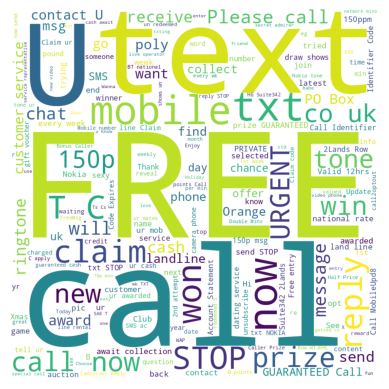

In [8]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(spam_sms)

plt.imshow(wc)
plt.axis("off")
plt.show()

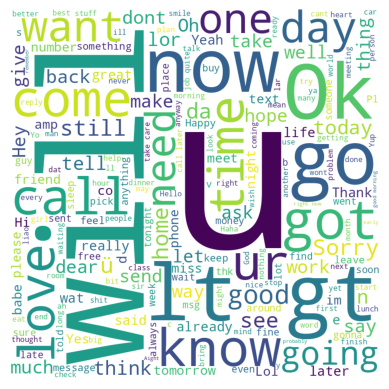

In [9]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(non_spam_sms)

plt.imshow(wc)
plt.axis("off")
plt.show()

In [10]:
english_stopwords = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def preprocess_document(document):
  tokens = word_tokenize(document.lower())
  clean_tokens = [token for token in tokens if token not in english_stopwords]
  clean_tokens = [token for token in clean_tokens if token not in punctuation]
  clean_tokens = [lemmatizer.lemmatize(token) for token in clean_tokens]
  clean_tokens = [lemmatizer.lemmatize(token,"v") for token in clean_tokens]
  return " ".join(clean_tokens)

In [11]:
#!pip install emoji

In [12]:
import emoji

In [13]:
df["Message"] = df["Message"].apply(emoji.demojize)

In [14]:
df["Message"] = df["Message"].apply(preprocess_document)

df.head()

,Category,Message
0,not spam,go jurong point crazy .. available bugis n gre...
1,not spam,ok lar ... joke wif u oni ...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,not spam,u dun say early hor ... u c already say ...
4,not spam,nah n't think go usf life around though


In [15]:
le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])
df.head()

,Category,Message
0,0,go jurong point crazy .. available bugis n gre...
1,0,ok lar ... joke wif u oni ...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor ... u c already say ...
4,0,nah n't think go usf life around though


In [16]:
# feature and target
# train test spilt

X = df["Message"]
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv = CountVectorizer() 
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [19]:
X_train_cv

<3900x6177 sparse matrix of type '<class 'numpy.int64'>'
	with 33014 stored elements in Compressed Sparse Row format>

In [20]:
# train
dt = DecisionTreeClassifier()
dt.fit(X_train_cv,y_train)

DecisionTreeClassifier()

In [21]:
# prediction
y_pred = dt.predict(X_test_cv)

In [22]:
# evaluation
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1442
           1       0.92      0.87      0.89       230

    accuracy                           0.97      1672
   macro avg       0.95      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672



In [23]:
sms1 = "Hey, how are you, call in the evening"
sms2 = "Hi, let's catch up tonight"
sms3 = "FREE gifts worth 100 dollar, claim it"
sms4 = "Apply for loan at minimum interest rate, click on the link below"

In [24]:
def predict_spam_sms(sms):
  sms_cv = cv.transform([sms])
  prediction = dt.predict(sms_cv)
  return le.inverse_transform(prediction)[0]

In [25]:
predict_spam_sms(sms1)

'not spam'

In [26]:
predict_spam_sms(sms2)

'not spam'

In [27]:
predict_spam_sms(sms3)

'spam'

In [28]:
predict_spam_sms(sms4)

'not spam'